In [70]:
from osrs_GE import *
import GE_object
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.3f}'.format

In [72]:
df_CTI = read_CTI_master_file('24h')
df_CTI.head()

timestamp  avgHighPrice  avgLowPrice  highPriceVolume  \
id date                                                                 
2  2023-09-04  1693785600           158      153.000         25448193   
   2023-09-05  1693872000           157      152.000         20442989   
   2023-09-06  1693958400           155      151.000         18166461   
   2023-09-07  1694044800           154      151.000         19839631   
   2023-09-08  1694131200           153      150.000         19325295   

               lowPriceVolume  
id date                        
2  2023-09-04         7792403  
   2023-09-05         7067147  
   2023-09-06         7738376  
   2023-09-07         6687883  
   2023-09-08         7420479

In [74]:
check(df_CTI)[0]

timestamp  avgHighPrice  avgLowPrice  highPriceVolume  \
id   date                                                                 
1779 2024-04-14  1713052800             1          NaN          4782387   
7936 2024-04-03  1712102400             1          NaN         92224230   
     2024-05-04  1714780800             1          NaN        156057008   
     2024-07-14  1720915200             1          NaN         96610687   
     2024-09-07  1725667200             1          NaN         82634241   
     2024-09-08  1725753600             1          NaN         97020187   
     2024-09-11  1726012800             1          NaN         95224109   

                 lowPriceVolume  
id   date                        
1779 2024-04-14               0  
7936 2024-04-03               0  
     2024-05-04               0  
     2024-07-14               0  
     2024-09-07               0  
     2024-09-08               0  
     2024-09-11               0

In [76]:
for idx,new_df in check(df_CTI)[0].groupby(level=0):
    print(idx, item_name_from_id(idx))

1779 Flax
7936 Pure essence


- pure essence can just set the price to 1 or just exclude because that never moves, same with the flax
- cowhide/rune armor set - can impute with a interpolated value from surrounding days or look at average price difference between high and low for the year

In [79]:
to_check = check(df_CTI)[0]
for idx in to_check.index:
    if idx[0] in (1779,7936):
        df_CTI.loc[(idx[0],idx[1]),'avgLowPrice'] = 1

## Exploring

In [84]:
df_CTI.groupby("id")[['avgHighPrice','avgLowPrice','highPriceVolume','lowPriceVolume']].mean()

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume
id,,,,
2,189.175,184.492,"21,850,473.338","8,227,444.997"
225,487.149,479.662,"349,936.838","585,839.963"
231,381.073,375.757,"892,315.568","829,999.094"
263,"3,608.804","3,585.089","36,825.602","106,674.168"
377,95.838,94.416,"565,011.330","811,989.390"
385,815.618,807.476,"2,709,014.283","1,618,241.393"
444,175.901,174.230,"5,494,761.118","8,652,970.476"
453,165.455,163.063,"10,196,390.058","15,589,456.694"
536,"3,265.160","3,232.594","1,114,851.882","1,287,075.895"


In [85]:
df_CTI[df_CTI['avgHighPrice'] < df_CTI['avgLowPrice']].shape

(487, 5)

- this occurs when volume buys and/or sells aggressively past the last trade price
- flipping opportunity?
- could also represent some large intraday volatility

In [89]:
df_CTI.index.unique(level='id').shape

(27,)

In [91]:
df_CTI = compute_VWAP(df_CTI)

In [95]:
df_index

,name,id
0,Coal,453
1,Steel bar,2353
2,Gold ore,444
3,Nature rune,561
4,Death rune,560
5,Pure essence,7936
6,Yew logs,1515
7,Magic logs,1513
8,Cowhide,1739
9,Raw lobster,377


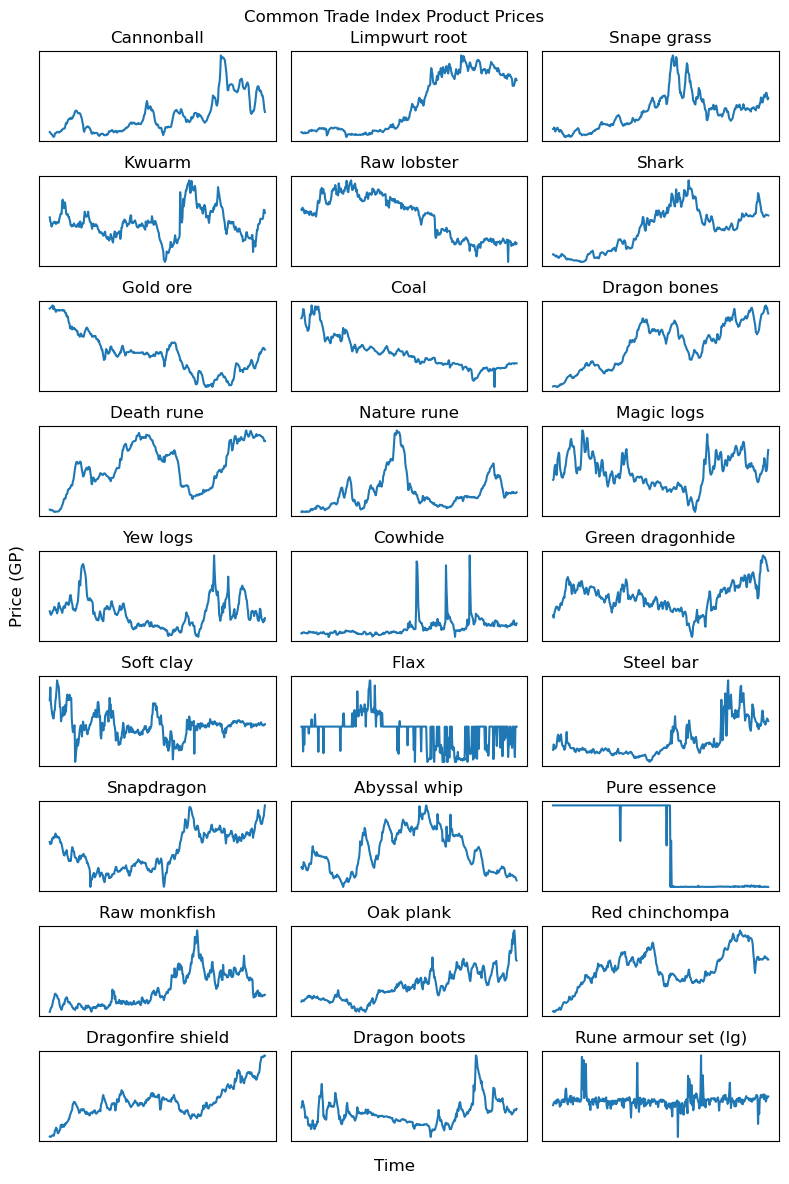

In [97]:
fig,axs = plt.subplots(9,3,figsize=(8,12))

ct = 0
for id, new_df in df_CTI.groupby(by='id'):
    ax = axs[ct//3, ct%3]
    ax.tick_params(bottom=False)
    
    ax.plot(new_df.index.get_level_values(1),new_df['VWAP'])
    ax.set_title(item_name_from_id(id))

    ct += 1


fig.supxlabel("Time")
fig.supylabel("Price (GP)")
fig.suptitle("Common Trade Index Product Prices")


plt.setp(axs, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

In [99]:
df_CTI['simpRet'] = (df_CTI['VWAP']/df_CTI.groupby('id')['VWAP'].shift(1)) - 1

df_CTI.groupby('id')['simpRet'].agg(nrow=lambda x:x.shape[0])

,nrow
id,
2,382
225,382
231,382
263,382
377,382
385,382
444,382
453,382
536,382


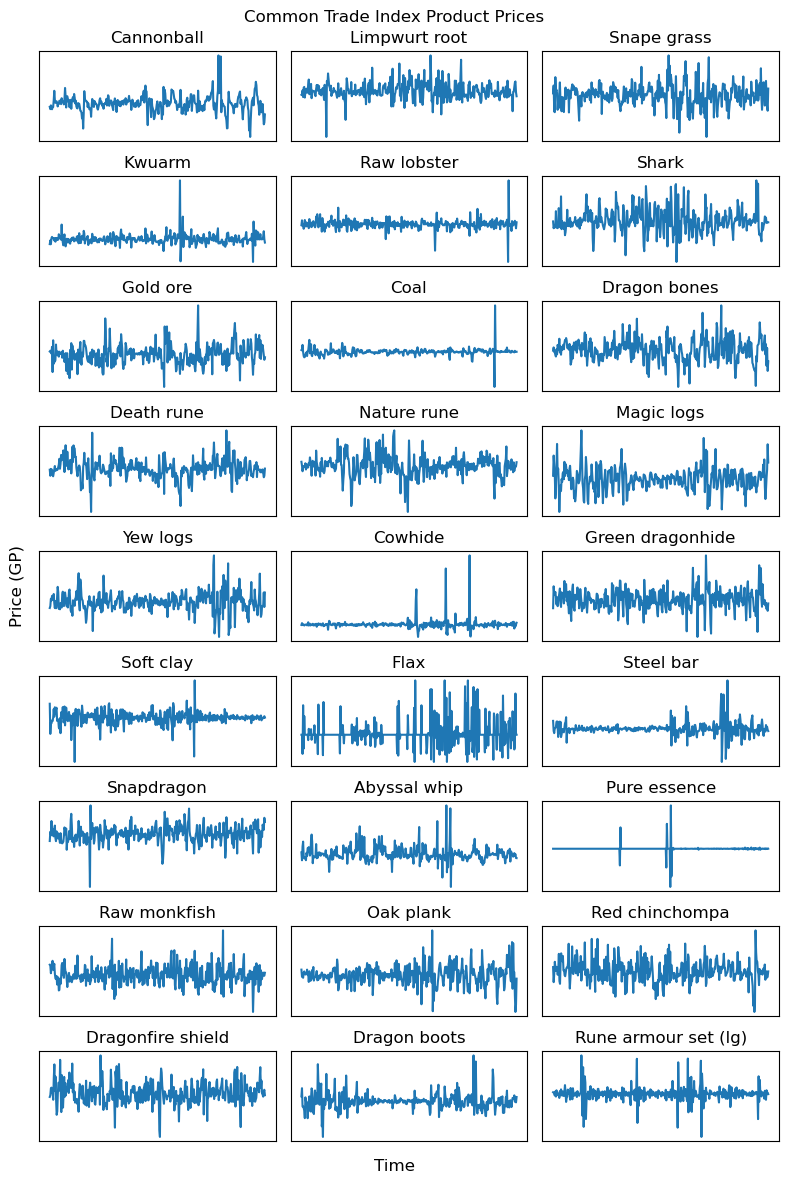

In [101]:
fig,axs = plt.subplots(9,3,figsize=(8,12))

ct = 0
for id, new_df in df_CTI.groupby(by='id'):
    ax = axs[ct//3, ct%3]
    ax.tick_params(bottom=False)
    
    ax.plot(new_df.index.get_level_values(1),new_df['simpRet'])
    ax.set_title(item_name_from_id(id))

    ct += 1


fig.supxlabel("Time")
fig.supylabel("Price (GP)")
fig.suptitle("Common Trade Index Product Prices")

plt.setp(axs, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

In [105]:
lret_vol = ((np.log(df_CTI.groupby('id')['VWAP'].shift(-1)/df_CTI['VWAP'])).groupby('id').std()
            *np.sqrt(365)).sort_values()

lret_vol.index = pd.Series(lret_vol.index.values).apply(item_name_from_id)
lret_vol

Gold ore               0.113
Snapdragon             0.191
Magic logs             0.266
Rune armour set (lg)   0.275
Dragon bones           0.300
Abyssal whip           0.323
Green dragonhide       0.327
Raw lobster            0.340
Dragon boots           0.342
Death rune             0.355
Cannonball             0.359
Oak plank              0.380
Dragonfire shield      0.397
Nature rune            0.420
Soft clay              0.468
Red chinchompa         0.474
Kwuarm                 0.521
Coal                   0.544
Yew logs               0.548
Shark                  0.563
Limpwurt root          0.582
Snape grass            0.683
Steel bar              0.685
Raw monkfish           0.775
Pure essence           1.059
Cowhide                2.143
Flax                   4.238
Name: VWAP, dtype: float64

In [131]:
sret_vol = df_CTI.groupby('id')['simpRet'].std()*np.sqrt(365)
notional_vol = sret_vol*df_CTI.groupby('id')['VWAP'].last()
last_px = df_CTI.groupby('id')['VWAP'].last()

df_tmp = pd.concat([sret_vol,notional_vol,last_px],axis=1)
df_tmp.columns = ['Vol','Notional Vol','Last Price']
df_tmp.index = pd.Series(df_tmp.index.values).apply(item_name_from_id)
display(df_tmp.sort_values(by='Notional Vol',ascending=False))

,Vol,Notional Vol,Last Price
Dragonfire shield,0.397,"1,945,099.938","4,893,831.102"
Abyssal whip,0.328,"440,123.353","1,343,696.054"
Dragon boots,0.345,"44,060.279","127,671.736"
Rune armour set (lg),0.275,"36,033.877","130,905.407"
Kwuarm,0.544,"2,091.529","3,846.206"
Snapdragon,0.191,"1,664.522","8,731.427"
Dragon bones,0.300,"1,269.388","4,227.623"
Red chinchompa,0.475,827.921,"1,743.252"
Shark,0.567,561.187,989.537
Cowhide,3.051,553.111,181.306


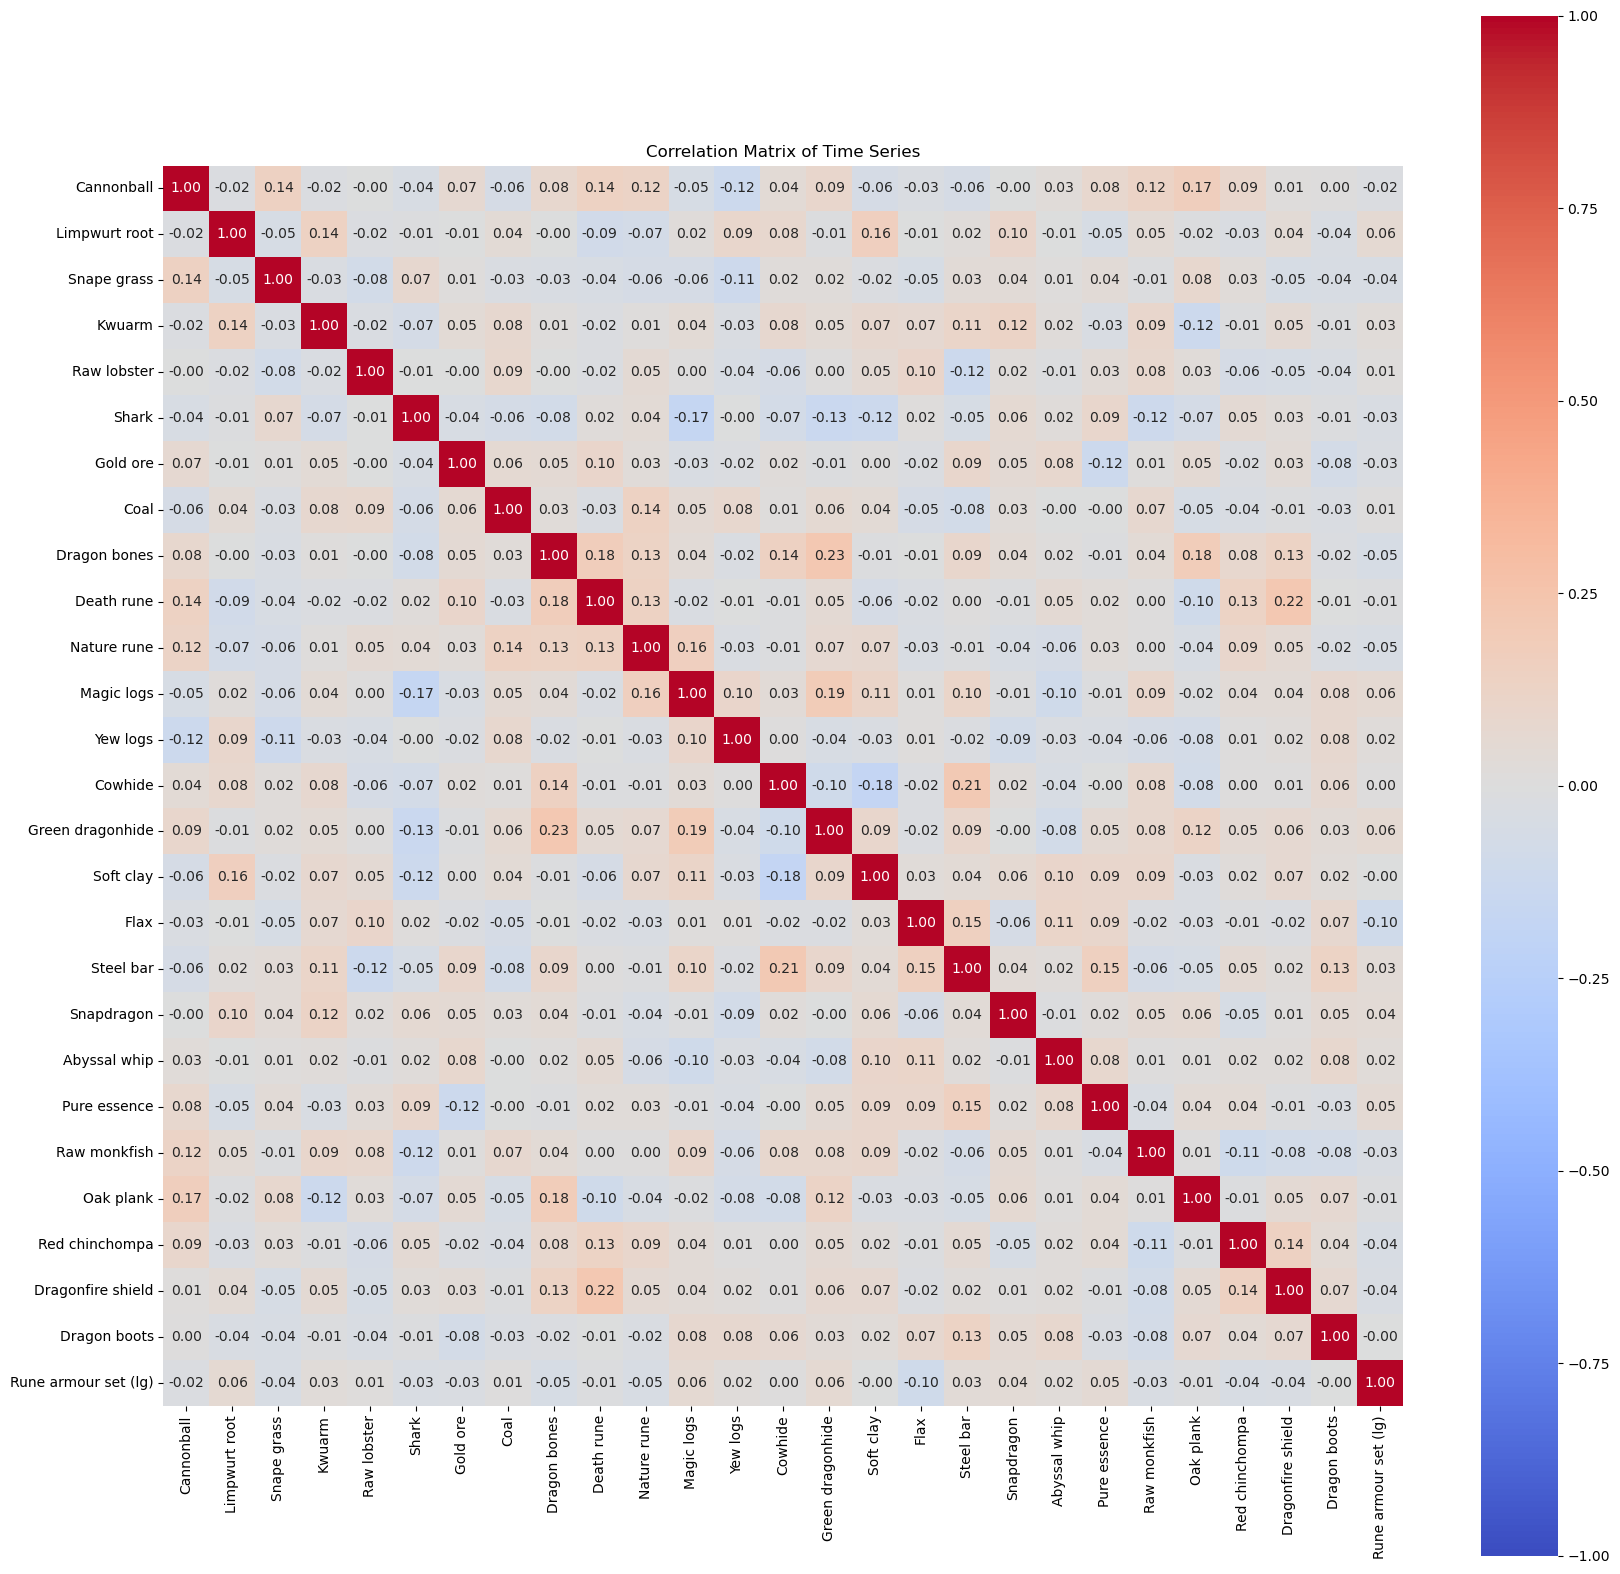

In [133]:
df_corr = pd.DataFrame()

for idx,df_select in df_CTI.groupby(level='id'):
    date_index = df_select.index.get_level_values(1)
    
    temp = pd.DataFrame(index = date_index)
    temp[idx] = df_select.loc[idx,'simpRet']

    df_corr = df_corr.join(temp,how='outer')

df_corr = df_corr.dropna()

corr_matrix = df_corr.rename(item_name_from_id,axis=1).corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',square=True,vmin=-1,vmax=1)

plt.title('Correlation Matrix of Time Series')
plt.show()

In [135]:
from statsmodels.tsa.stattools import adfuller

pd.reset_option('display.float_format')
adf_res = (df_CTI.dropna()).groupby(level=['id'])['simpRet'].agg(ADFtest = 
                                                                lambda x:adfuller(x)[1]<.05,
                                                               ADFtest_p_val =
                                                                lambda x:adfuller(x)[1])

adf_res = adf_res.rename(index=item_name_from_id)
adf_res.sort_values('ADFtest_p_val',ascending=False)

,ADFtest,ADFtest_p_val
id,,
Snape grass,True,6.811501e-10
Gold ore,True,5.107877e-10
Magic logs,True,3.893292e-10
Steel bar,True,1.983396e-10
Kwuarm,True,2.136392e-11
Green dragonhide,True,1.417334e-11
Death rune,True,2.591129e-13
Dragon bones,True,1.205078e-15
Rune armour set (lg),True,7.819347e-16


# Beta

In [139]:
return_last_n_days(df_CTI,30)

,30_days_ret,name
id,,
7944,-0.220953,Raw monkfish
2,-0.210063,Cannonball
10034,-0.180123,Red chinchompa
561,-0.164119,Nature rune
225,-0.072561,Limpwurt root
4151,-0.064707,Abyssal whip
1515,-0.061438,Yew logs
11840,-0.044180,Dragon boots
536,-0.039350,Dragon bones


File read successfully for Master Files/items/master_file_11284_24h.csv


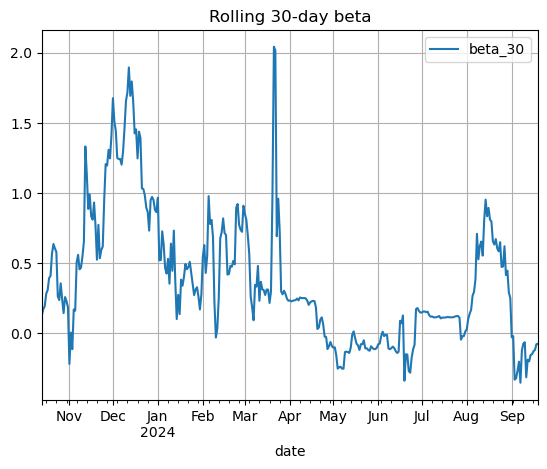

,beta_30
date,
2023-10-13,0.127484
2023-10-14,0.168795
2023-10-15,0.190430
2023-10-16,0.279042
2023-10-17,0.304671
...,...
2024-09-15,-0.152812
2024-09-16,-0.130519
2024-09-17,-0.122539


In [147]:
from sklearn.linear_model import LinearRegression

def _compute_beta(series,index,print_errors = False):
    try:
        s1 = pd.Series(series.values,index=series.index.get_level_values(1),name='s')
    except:
        s1 = pd.Series(series,name='s')
    s2 = pd.Series(index,name='idx')
    df = pd.concat([s1,s2],axis=1)
    if not df[df.isna().any(axis=1)].empty and print_errors:
        print(series.index.get_level_values(0)[0])
        print(df[df.isna().any(axis=1)])
    
    df = df.dropna()
    
    model = LinearRegression(fit_intercept=False).fit(df['idx'].values.reshape(-1,1),df['s'])
    return model.coef_[0]


def compute_betas(df,n,print_missing=False,print_errors=False):
    # compute betas over different time frames
    start_date = datetime.today() - pd.Timedelta(n,'D')
    
    if type(df.index) == pd.core.indexes.multi.MultiIndex:
        CTI_idx = compute_CTI(df = df)
        CTI_idx_ret = (CTI_idx/CTI_idx.shift(1)) - 1
        #start_date = df.groupby('id')['simpRet'].agg(latest = lambda x:x.index.levels[1].max()).min().values[0] - pd.Timedelta(n,'D')
        df_fltr = df[df.index.get_level_values(1) >= start_date]
        CTI_idx_ret = CTI_idx_ret[CTI_idx_ret.index >= start_date]
        nrows = df_fltr.groupby('id')['simpRet'].agg(nrow=lambda x:x.shape[0])
        max_days = nrows.max().values[0]
        if print_missing:
            print(nrows[nrows['nrow']!= max_days])
        res = df_fltr.groupby('id')['simpRet'].agg(beta = lambda x:_compute_beta(x,CTI_idx_ret,print_errors))
        res['name'] = pd.Series(res.index.values).apply(item_name_from_id).values
        res = (res.rename({'beta':'beta_'+str(n)},axis=1)).sort_values(by='beta_'+str(n))
    else:
        CTI_idx = compute_CTI()
        CTI_idx_ret = (CTI_idx/CTI_idx.shift(1)) - 1
        df_fltr = df[df.index >= start_date]
        CTI_idx_ret = CTI_idx_ret[CTI_idx_ret.index >= start_date]
        res = _compute_beta(df_fltr['simpRet'],CTI_idx_ret,print_errors)
        
    return res
        
    
    
def rolling_betas(item_id,window_size = 30,interval='24h',plot=False):
    CTI_idx = compute_CTI(interval=interval)
    CTI_idx_ret = (CTI_idx/CTI_idx.shift(1)) - 1
    
    if item_id == 0:
        # debugging
        CTI_series = compute_CTI(interval=interval)
        item_ret_series = (CTI_series/CTI_series.shift(1))-1
    else:
        df_item = compute_VWAP(read_item_master_file(item_id,interval))
        item_ret_series = (df_item['VWAP']/df_item['VWAP'].shift(1))-1
    
    
    CTI_idx_ret = CTI_idx_ret.dropna()
    item_ret_series = item_ret_series.dropna()
    df = pd.DataFrame({'CTI_ret':CTI_idx_ret,str(item_id)+'_ret':item_ret_series}).dropna()
    rolling = df[['CTI_ret']].rolling(window=window_size,min_periods=window_size)
    res = ((rolling.cov(df[str(item_id)+'_ret']))/rolling.var()).dropna().rename({'CTI_ret':'beta_'+str(window_size)},axis=1)
    if plot:
        res.plot()
        plt.grid()
        plt.title('Rolling {}-day beta'.format(window_size))
        plt.show()
    
    return res
    
rolling_betas(11284,plot=True)

In [153]:
compute_betas(df_CTI.loc[11284],30)

-0.0519590237034747

In [151]:
compute_betas(df_CTI,30)

,beta_30,name
id,,
385,-1.478438,Shark
1515,-0.478359,Yew logs
13024,-0.384261,Rune armour set (lg)
11840,-0.173076,Dragon boots
377,-0.159217,Raw lobster
1761,-0.116902,Soft clay
453,0.004243,Coal
3000,0.130756,Snapdragon
560,0.138768,Death rune


---

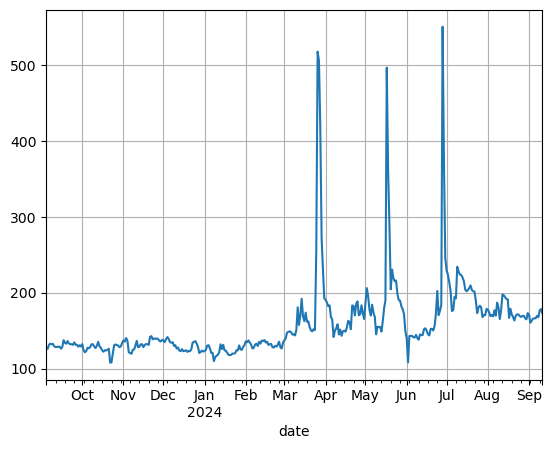

In [32]:
df_CTI.loc[1739]['VWAP'].plot()
plt.grid()
plt.show()

In [35]:
df_CTI.loc[1739].sort_values(by='VWAP',ascending=False)

,timestamp,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,VWAP,simpRet
date,,,,,,,
2024-06-28,1719532800,796,444.0,17279,39824,550.512933,1.986076
2024-03-26,1711411200,575,494.0,26433,63737,517.744849,1.013649
2024-03-27,1711497600,451,531.0,34064,74724,505.950178,-0.022781
2024-05-17,1715904000,724,458.0,6209,36560,496.616615,1.610819
2024-03-28,1711584000,458,408.0,29214,95712,419.692522,-0.170486
...,...,...,...,...,...,...,...
2024-01-09,1704758400,116,115.0,9497,13270,115.417139,0.049198
2024-01-08,1704672000,118,106.0,9337,18638,110.005147,-0.091423
2023-10-23,1698019200,110,106.0,71254,41527,108.527163,0.005089


---

In [33]:
date1 = '2024-08-10'
date2 = '2024-09-10'

fltr = (df_CTI.index.get_level_values(1) >= date1) & (df_CTI.index.get_level_values(1) <= date2)
last_n_df = df_CTI.loc[fltr]

last_n_ret = last_n_df.groupby('id')['VWAP'].agg(ret = lambda x:x.iloc[-1]/
                                                       x.iloc[0] - 1).sort_values(by='ret')
# pure essence numbers are bad
last_n_ret = last_n_ret.dropna()

last_n_df['ttlVolume'] = last_n_df['highPriceVolume'] + last_n_df['lowPriceVolume']
last_n_df['norm_ttlVolume']=last_n_df['ttlVolume']/last_n_df.groupby('id')['ttlVolume'].transform('first')

last_n_df['norm_VWAP']=last_n_df['VWAP']/(last_n_df.groupby('id')['VWAP'].transform('first'))

return_between(df_CTI,date1,date2)

/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_8608/175820045.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_n_df['ttlVolume'] = last_n_df['highPriceVolume'] + last_n_df['lowPriceVolume']
/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_8608/175820045.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_n_df['norm_ttlVolume']=last_n_df['ttlVolume']/last_n_df.groupby('id')['ttlVolume'].transform('first')
/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_8608/175

,ret,name
id,,
7944,-0.261473,Raw monkfish
561,-0.222540,Nature rune
10034,-0.197235,Red chinchompa
1515,-0.165570,Yew logs
11840,-0.135847,Dragon boots
225,-0.120801,Limpwurt root
2,-0.071308,Cannonball
377,-0.024347,Raw lobster
4151,-0.014624,Abyssal whip


we can ignore flax because it only really trades at 1 or 2 gp.

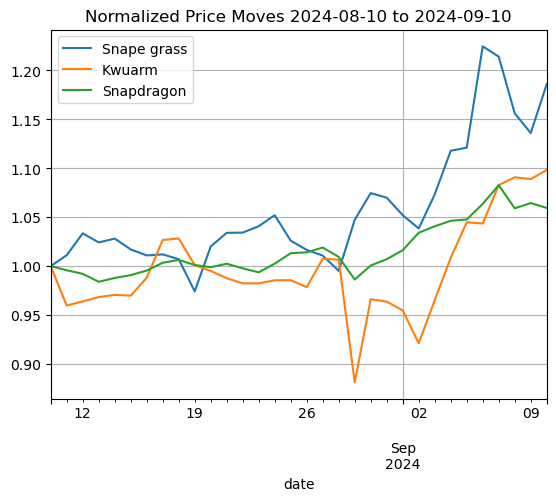

In [34]:
last_n_df.loc[231,'norm_VWAP'].plot(label=item_name_from_id(231))
last_n_df.loc[263,'norm_VWAP'].plot(label=item_name_from_id(263))
last_n_df.loc[3000,'norm_VWAP'].plot(label=item_name_from_id(3000))
plt.legend()
plt.grid()
plt.title('Normalized Price Moves {0} to {1}'.format(last_n_df.index.get_level_values(1).min().strftime('%Y-%m-%d'),
                                                    last_n_df.index.get_level_values(1).max().strftime('%Y-%m-%d')))
plt.show()